In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error  , r2_score , mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import zscore

In [4]:
from sklearn.impute import KNNImputer

In [5]:
import pickle
import json
import re

### 1.Problem Statement

### 2.Data Gathering

In [116]:
df = pd.read_csv(r"E:\projects\Used Car price Prediction\artifacts\train-data.csv")

In [117]:
df.sample(1)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4132,4132,Maruti Swift Dzire ZXI,Chennai,2017,28000,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0,NaN,6.25


### 3.EDA

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [119]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Name,Maruti Wagon R LXI CNG,Hyundai Creta 1.6 CRDi SX Option,Honda Jazz V,Maruti Ertiga VDI,Audi A4 New 2.0 TDI Multitronic
Location,Mumbai,Pune,Chennai,Chennai,Coimbatore
Year,2010,2015,2011,2012,2013
Kilometers_Driven,72000,41000,46000,87000,40670
Fuel_Type,CNG,Diesel,Petrol,Diesel,Diesel
Transmission,Manual,Manual,Manual,Manual,Automatic
Owner_Type,First,First,First,First,Second
Mileage,26.6 km/kg,19.67 kmpl,18.2 kmpl,20.77 kmpl,15.2 kmpl
Engine,998 CC,1582 CC,1199 CC,1248 CC,1968 CC


#### Name

In [120]:
df.Name

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 6019, dtype: object

In [121]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

In [122]:
df['Name'] = df['Name'].apply(lambda x:(re.search('[A-Za-z]+',x)).group())
df.Name.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault', 'Mercedes',
       'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar', 'Volvo',
       'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [112]:
df = pd.get_dummies(df, columns = ['Name'])

In [113]:
df

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo
0,0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,...,0,0,0,0,0,0,0,0,0,0
1,1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,...,0,0,0,0,0,0,0,0,0,0
2,2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,...,0,0,0,0,0,0,0,0,0,0
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,...,0,0,0,0,0,0,0,0,0,0
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,...,0,0,0,0,0,0,0,0,0,0
6015,6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,...,0,0,0,0,0,0,0,0,0,0
6016,6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,...,0,0,0,0,0,0,0,0,0,0
6017,6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,...,0,0,0,0,0,0,0,0,0,0


#### Location

In [114]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [16]:
df = pd.get_dummies(df, columns = ['Location'])

#### KM Driven

In [17]:
df['Kilometers_Driven']

0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 6019, dtype: int64

#### Fuel_Type

In [18]:
df.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [19]:
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol' : 0  , 'Diesel' :1 ,'CNG'  : 3 ,
                                           'LPG': 2 ,'Electric' : 4 })

#### Transmission

In [20]:
df.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [21]:
df.Transmission.replace({'Manual':0, 'Automatic':1}, inplace = True)

#### Owner_Type

In [22]:
df.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [23]:
df.Owner_Type.replace({'First' :1, 'Second' :2, 'Third' :3 , 'Fourth & Above' : 4} , inplace = True)

In [24]:
df.Owner_Type

0       1
1       1
2       1
3       1
4       2
       ..
6014    1
6015    1
6016    2
6017    1
6018    1
Name: Owner_Type, Length: 6019, dtype: int64

#### Mileage

In [25]:
df.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [26]:
df.Mileage.isnull().value_counts()

False    6017
True        2
Name: Mileage, dtype: int64

In [27]:
null_index = df['Mileage'].loc[df['Mileage'].isna() == True].index
df['Mileage'][null_index]

4446    NaN
4904    NaN
Name: Mileage, dtype: object

In [28]:
index = df['Mileage'].loc[df['Mileage'].isna() == False].index
index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018],
           dtype='int64', length=6017)

In [29]:
f_mileage = lambda x:(re.search('[0-9.]+',str(x)).group())
df['Mileage'][index] = df['Mileage'][index].apply(f_mileage)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8820\1053831193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'][index] = df['Mileage'][index].apply(f_mileage)


In [30]:
tru_mileage = df['Mileage'][index].astype(float)

In [31]:
zs = zscore(tru_mileage)

In [32]:
oindex = np.where(np.abs(zs>3))[0]       # Outlier Detection
oindex

array([1269, 1332, 2059, 2371, 3119, 3129, 3553, 3869, 4141, 4768, 5933],
      dtype=int64)

<AxesSubplot: >

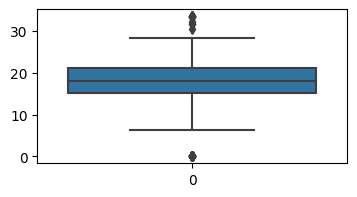

In [33]:
plt.figure(figsize = (4,2))              # Outlier Detection
sns.boxplot(tru_mileage)

In [34]:
q1= np.quantile(tru_mileage,0.25)
q3= np.quantile(tru_mileage,0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5*iqr
upper_tail = q3 + 1.5*iqr
print (lower_tail , upper_tail)

6.274999999999997 29.995000000000005


In [35]:
tru_mileage = np.where(tru_mileage < lower_tail , lower_tail , tru_mileage )
tru_mileage = np.where(tru_mileage > upper_tail , upper_tail , tru_mileage )

<AxesSubplot: >

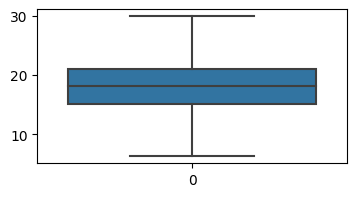

In [36]:
plt.figure(figsize = (4,2))
sns.boxplot(tru_mileage)

In [37]:
df['Mileage'][index] = tru_mileage

C:\Users\Admin\AppData\Local\Temp\ipykernel_8820\2185611869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'][index] = tru_mileage


<AxesSubplot: >

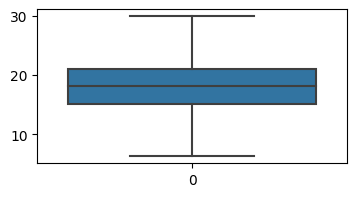

In [38]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Mileage'])

In [39]:
df['Mileage'].isna().value_counts()

False    6017
True        2
Name: Mileage, dtype: int64

In [40]:
kni_mileage = KNNImputer(n_neighbors = 3)
arr = kni_mileage.fit_transform(df[['Mileage']])
df['Mileage'] = pd.DataFrame(arr , columns = ['Mileage'])

In [41]:
df.Mileage.isna().sum()
df.Mileage

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6019, dtype: float64

#### Engine

In [42]:
df.Engine.isna().value_counts()

False    5983
True       36
Name: Engine, dtype: int64

In [43]:
df.Engine.isna().value_counts()

False    5983
True       36
Name: Engine, dtype: int64

In [44]:
engine_index = df['Engine'].loc[df['Engine'].isna() == False].index

In [45]:
engine_function = lambda x:( re.search('[0-9.]+' , str(x)).group())
df['Engine'][engine_index] = df['Engine'][engine_index].apply(engine_function)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8820\3587466427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine'][engine_index] = df['Engine'][engine_index].apply(engine_function)


<AxesSubplot: xlabel='Engine', ylabel='Density'>

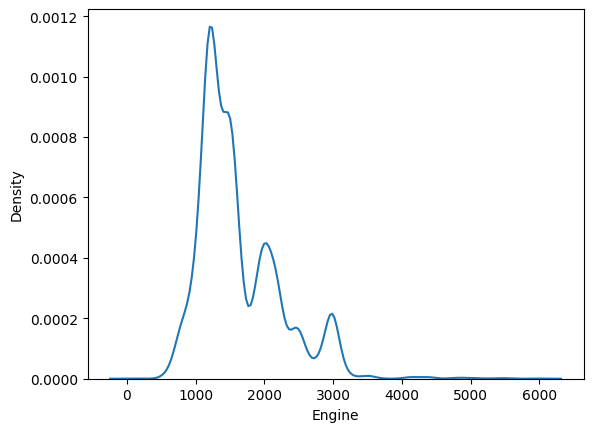

In [46]:
tru_engine = df['Engine'][engine_index].astype(float)
sns.kdeplot(tru_engine)

In [47]:
zs_engine = zscore(tru_engine)

In [48]:
engine_outlier_index = np.where(np.abs(zs_engine)>3)[0]   # Outlier Detection
engine_outlier_index

array([  70,  152,  457,  584,  587,  691,  794,  922, 1034, 1089, 1346,
       1588, 1922, 2090, 2294, 2664, 2958, 3045, 3222, 3320, 3556, 4013,
       4110, 4314, 4360, 4423, 4531, 4597, 4661, 4690, 4789, 4837, 4906,
       5054, 5305, 5378, 5380, 5485, 5567, 5692, 5745, 5849, 5883, 5975],
      dtype=int64)

<AxesSubplot: >

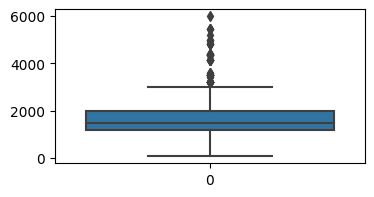

In [49]:
plt.figure(figsize = (4,2))              # Outlier Detection
sns.boxplot(tru_engine)

In [50]:
e1 = np.quantile(tru_engine, 0.25)
e3 = np.quantile(tru_engine , 0.75)
eiqr = 1.5* (e3 - e1)
le_tail = e1 - eiqr
ue_tail = e3 + eiqr
print(le_tail , ue_tail)

19.0 3163.0


In [51]:
tru_engine = np.where(tru_engine<le_tail , le_tail, tru_engine)
tru_engine = np.where(tru_engine>ue_tail , ue_tail, tru_engine)

In [52]:
df['Engine'][engine_index] = tru_engine

C:\Users\Admin\AppData\Local\Temp\ipykernel_8820\4265887768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine'][engine_index] = tru_engine


<AxesSubplot: >

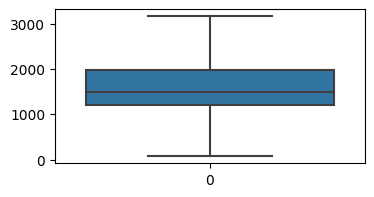

In [53]:
plt.figure(figsize = (4,2))  
sns.boxplot(df['Engine'])

In [54]:
df['Engine'].isna().sum()

36

In [55]:
kni_engine = KNNImputer(n_neighbors = 3)
arr_eng = kni_engine.fit_transform(df[['Engine']])
df['Engine'] = pd.DataFrame(arr_eng , columns = ['Engine'])

In [56]:
df['Engine'].isna().sum()

0

#### Power

In [57]:
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [58]:
df['Power'].replace({'null bhp' : np.nan } , inplace = True)

In [59]:
power_index = df['Power'].loc[df['Power'].isna() == False].index
power_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018],
           dtype='int64', length=5876)

In [60]:
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [61]:
df['Power'][power_index]

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5876, dtype: object

In [62]:
power_function = lambda x:(re.search('[0-9.]+',str(x)).group())
df['Power'][power_index] = df['Power'][power_index].apply(power_function)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8820\601399361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'][power_index] = df['Power'][power_index].apply(power_function)


In [63]:
df['Power'][power_index]

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 5876, dtype: object

In [64]:
tru_power = df['Power'][power_index].astype(float)

In [65]:
zs_power = zscore(tru_power)
power_outliers_index = np.where(np.abs(zs_power)>3)
power_outliers_index

(array([  70,  130,  143,  147,  314,  379,  405,  443,  489,  568,  571,
         672,  773, 1009, 1063, 1093, 1315, 1696, 1884, 1928, 1938, 2040,
        2046, 2050, 2450, 2479, 2586, 2818, 2829, 2900, 3051, 3160, 3183,
        3256, 3402, 3432, 3957, 4078, 4234, 4250, 4278, 4341, 4449, 4515,
        4578, 4605, 4660, 4698, 4703, 4750, 4773, 4817, 4963, 5165, 5212,
        5287, 5329, 5389, 5401, 5469, 5638, 5644, 5779, 5865], dtype=int64),)

<AxesSubplot: >

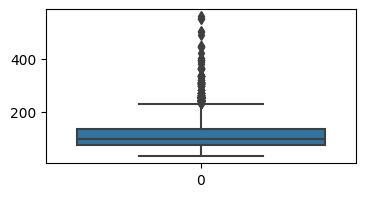

In [66]:
plt.figure(figsize = (4, 2))
sns.boxplot(tru_power)

In [67]:
p1 = np.quantile(tru_power , 0.25) 
p3 = np.quantile(tru_power , 0.75) 
piqr = 1.5* (p3 - p1)

lp_tail = p1 - piqr
up_tail = p3 + piqr

In [68]:
piqr

94.64999999999999

In [69]:
print(lp_tail)

-19.64999999999999


In [70]:
up_tail 

232.75

In [71]:
tru_power = np.where(tru_power>up_tail , up_tail , tru_power)

<AxesSubplot: >

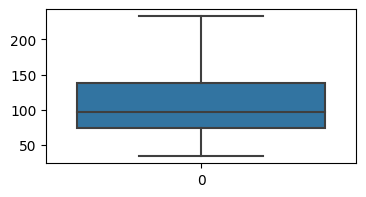

In [72]:
plt.figure(figsize = (4, 2))
sns.boxplot(tru_power)

In [73]:
df['Power'][power_index] = tru_power

C:\Users\Admin\AppData\Local\Temp\ipykernel_8820\2700361611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'][power_index] = tru_power


<AxesSubplot: >

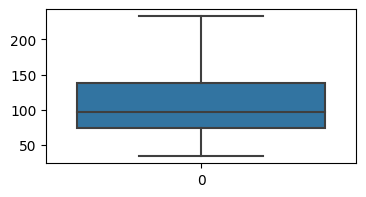

In [74]:
plt.figure(figsize = (4, 2))
sns.boxplot(df['Power'])

In [75]:
kni_power = KNNImputer(n_neighbors = 3)
arr_power = kni_power.fit_transform(df[['Power']])
df ['Power'] = pd.DataFrame(arr_power , columns = ['Power'])

In [76]:
df['Power'].isna().sum()

0

#### Seats

In [77]:
zs_seats = zscore(df['Seats'])

In [78]:
seats_outliers_index = np.where(np.abs(zs_seats)>3)
seats_outliers_index

(array([], dtype=int64),)

<AxesSubplot: xlabel='Seats', ylabel='Density'>

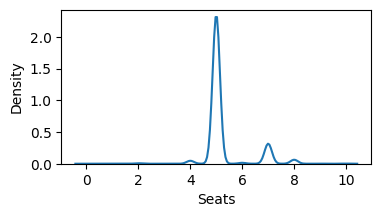

In [79]:
plt.figure(figsize = (4, 2))
sns.kdeplot(df['Seats'])

In [80]:
kni_seats = KNNImputer(n_neighbors = 3)
seats_arr = kni_seats.fit_transform(df[['Seats']])
df['Seats'] = pd.DataFrame(seats_arr , columns = ['Seats'])

In [81]:
df['Seats'].isna().sum()

0

#### year

In [82]:
df.rename({'Year': 'Age'}, axis  = 1, inplace = True)

In [83]:
f_year = lambda x : (2023-x)
df['Age']= df['Age'].apply(f_year)

In [84]:
df

,Unnamed: 0,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,13,72000,3,0,1,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,0,1,0
1,1,8,41000,1,0,1,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,0,1
2,2,12,46000,0,0,1,18.20,1199.0,88.70,5.0,...,0,1,0,0,0,0,0,0,0,0
3,3,11,87000,1,0,1,20.77,1248.0,88.76,7.0,...,0,1,0,0,0,0,0,0,0,0
4,4,10,40670,1,1,2,15.20,1968.0,140.80,5.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,9,27365,1,0,1,28.40,1248.0,74.00,5.0,...,0,0,0,1,0,0,0,0,0,0
6015,6015,8,100000,1,0,1,24.40,1120.0,71.00,5.0,...,0,0,0,0,0,1,0,0,0,0
6016,6016,11,55000,1,0,2,14.00,2498.0,112.00,8.0,...,0,0,0,0,0,1,0,0,0,0
6017,6017,10,46000,0,0,1,18.90,998.0,67.10,5.0,...,0,0,0,0,0,0,0,1,0,0


### Model Training 

In [85]:
x = df.drop(['Unnamed: 0','Price' ,'New_Price'] , axis = 1)
y = df['Price']

In [86]:
xtr , xts , ytr , yts = train_test_split(x,y, test_size = 0.2 , random_state = 33)

In [87]:
linreg = LinearRegression()
linreg.fit(xtr,ytr)

LinearRegression()

### Training Evaluation 

In [88]:
yptr = linreg.predict(xtr)
r2_score(ytr,yptr)

0.7670349167720211

### Testing Evaluation 

In [89]:
ypts = linreg.predict(xts)
r2_score(yts,ypts)

0.7524496134703648

In [90]:
col_list = x.columns.to_list()

In [91]:
col_list

['Age',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Name_Ambassador',
 'Name_Audi',
 'Name_BMW',
 'Name_Bentley',
 'Name_Chevrolet',
 'Name_Datsun',
 'Name_Fiat',
 'Name_Force',
 'Name_Ford',
 'Name_Honda',
 'Name_Hyundai',
 'Name_ISUZU',
 'Name_Isuzu',
 'Name_Jaguar',
 'Name_Jeep',
 'Name_Lamborghini',
 'Name_Land',
 'Name_Mahindra',
 'Name_Maruti',
 'Name_Mercedes',
 'Name_Mini',
 'Name_Mitsubishi',
 'Name_Nissan',
 'Name_Porsche',
 'Name_Renault',
 'Name_Skoda',
 'Name_Smart',
 'Name_Tata',
 'Name_Toyota',
 'Name_Volkswagen',
 'Name_Volvo',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune']

In [96]:
col_dict = {'Column_Names' : col_list , 
            'Fuel_Type' : {'Petrol' : 0  , 'Diesel' :1 ,'CNG'  : 3 ,
                           'LPG': 2 ,'Electric' : 4 } ,
            'Transmission': {'Manual':0, 'Automatic':1} , 
            'Owner_Type':{'First' :1, 'Second' :2, 'Third' :3 , 'Fourth & Above' : 4}}

In [102]:
c_index = col_dict["Column_Names"].index('Name_Ambassador')

'Column_Names'[c_index] = 1

In [93]:
with open('column_data.json' , 'w') as f:
    json.dump(col_dict,f)

In [94]:
with open('linreg.pkl' , 'wb') as f:
    pickle.dump(linreg,f)